# Unit 5 - Financial Planning


In [37]:
# Initial imports
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [38]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [39]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [40]:
# Crypto API URLs
#btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
#eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [41]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
res = requests.get(btc_url)
res                        

<Response [200]>

In [42]:
res = res.json()
res

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18685225,
   'total_supply': 18685225,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 59347.0,
     'volume_24h': 64311860777,
     'market_cap': 1110439563358,
     'percentage_change_1h': -0.168000492362874,
     'percentage_change_24h': -4.41615554853868,
     'percentage_change_7d': -1.05497488468213,
     'percent_change_1h': -0.168000492362874,
     'percent_change_24h': -4.41615554853868,
     'percent_change_7d': -1.05497488468213},
    'CAD': {'price': 74219.3582,
     'volume_24h': 80428413087.7162,
     'market_cap': 1388715717935.51,
     'percent_change_1h': -0.168000492362874,
     'percent_change_24h': -4.41615554853868,
     'percent_change_7d': -1.05497488468213}},
   'last_updated': 1618712056}},
 'metadata': {'timestamp': 1618712056,
  'num_cryptocurrencies': 1312,
  'error': None}}

In [43]:
btc_price = res["data"]["1"]["quotes"]["USD"]["price"]
btc_price

59347.0

In [44]:
# Fetch current ETH price
# YOUR CODE HERE!]
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
res = requests.get(eth_url)
res

<Response [200]>

In [45]:
res = res.json()
res

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115513471,
   'total_supply': 115513471,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2296.29,
     'volume_24h': 37214396379,
     'market_cap': 265259272349,
     'percentage_change_1h': 0.546433721801956,
     'percentage_change_24h': -7.49338666097103,
     'percentage_change_7d': 7.16312552055448,
     'percent_change_1h': 0.546433721801956,
     'percent_change_24h': -7.49338666097103,
     'percent_change_7d': 7.16312552055448},
    'CAD': {'price': 2871.740274,
     'volume_24h': 46540324111.5774,
     'market_cap': 331733245999.659,
     'percent_change_1h': 0.546433721801956,
     'percent_change_24h': -7.49338666097103,
     'percent_change_7d': 7.16312552055448}},
   'last_updated': 1618712007}},
 'metadata': {'timestamp': 1618712007,
  'num_cryptocurrencies': 1312,
  'error': None}}

In [46]:
eth_price = res["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

2296.29

In [47]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc *btc_price
my_eth_value = my_eth *eth_price

In [48]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71216.40
The current value of your 5.3 ETH is $12170.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [49]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [50]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [51]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-04-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                    SPY  \
                              open     high  low   close   volume    open   
2021-04-12 00:00:00-04:00  114.172  114.172  114  114.15  3486052  410.85   

                                                            
                             high    low   close    volume  
2021-04-12 00:00:00-04:00  411.93  410.2  411.62  51358274

In [52]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $114.15
Current SPY closing price: $411.62


In [53]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg *agg_close_price
my_spy_value = my_spy *spy_close_price


my_spy_value
#agg_value = agg_close_price * 
#spy_value = spy_close_price * df_shares.loc["AAPL"]["shares"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20581.00
The current value of your 200 AGG shares is $22830.00


### Savings Health Analysis

In [59]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
amount = {"amount":[crypto, shares]}

df_savings = pd.DataFrame(amount, index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,83386.737
shares,43411.000


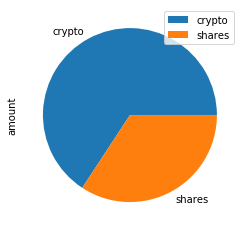

In [60]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount")

In [128]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_saving = shares + crypto
total_saving

# Validate saving health
# YOUR CODE HERE!
if total_saving > emergency_fund:
   print("congratulating you have sufficent funds")
elif total_saving == emergency_fund:
    print("congratulating you reach your financial goal")
else: 
  print("you are {} dollars away from reaching the goal".format(emergency_fund - total_saving))


congratulating you have sufficent funds


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [140]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [141]:
# Get 5 years' worth of historical data for SPY and AGG


tickers = ["AGG", "SPY"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                              SPY                                    
                             open    high     low   close    volume  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103

In [142]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


# Setting  number of simulations
num_sims = 500

MC_StockData = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [143]:
# Printing the simulation input data
MC_StockData.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-08-18 00:00:00-04:00          NaN  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.82  218.91  217.36  217.88   

                                                  
                             volume daily_return  
2016-08-18 00:00:00-04:00  42850145          NaN  
2016-08-19 00:00:00-04:00  52238224    -0.001371  
2016-08-22 00:00:00-04:00  48628907    -0.000320  
2016-08-23 00:00:00-04:00  41981207     0.002014  
2016-08-24 00:00:00-04:00  50310103    -0.004842

In [144]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_StockData.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003136,1.015791,1.000908,0.999830,1.009773,1.002721,0.995883,0.995884,1.006807,1.002931,...,0.988409,1.002386,0.986861,1.005764,0.994858,0.994739,1.007706,1.004268,1.004657,1.003154
2,1.012794,1.008242,1.000278,1.010932,1.021594,1.013092,1.011142,0.991325,0.998971,1.002387,...,0.982938,1.007891,0.986709,0.996063,0.998449,0.992063,1.006992,1.002962,1.001168,0.995310
3,1.020146,1.010101,1.005434,1.009120,1.010806,1.010343,1.015318,0.994523,1.009302,0.996293,...,0.995881,1.013383,0.979983,0.988039,0.991769,0.992545,1.013173,1.004947,0.997943,1.002039
4,1.017499,1.001869,1.001698,1.007235,1.010751,1.017219,1.018786,0.987709,1.004439,0.996422,...,1.006994,1.015218,0.977210,0.989582,0.992433,0.990609,1.017572,1.010168,1.001288,1.009127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.504790,5.144816,4.630507,6.343067,19.404321,11.541380,13.432398,6.828350,5.003138,7.560815,...,2.025640,12.163735,9.072292,10.441966,15.142068,12.248271,16.363463,10.445242,31.588448,9.416057
7557,9.473660,5.127434,4.609102,6.343931,19.293039,11.529386,13.543358,6.870134,4.948322,7.629204,...,2.023838,12.112812,8.988612,10.350605,14.910400,12.224740,16.517843,10.509688,31.706346,9.369866
7558,9.451710,5.087808,4.650475,6.353598,19.290502,11.582455,13.558244,6.819241,4.909384,7.663814,...,2.009768,12.279186,8.921624,10.291837,14.869883,12.266433,16.584561,10.506477,32.078801,9.325802
7559,9.477719,5.105225,4.633935,6.344487,19.367418,11.585378,13.548648,6.799380,4.890372,7.718191,...,1.999389,12.308985,8.817239,10.357477,14.946349,12.347444,16.592449,10.459188,31.956639,9.462755


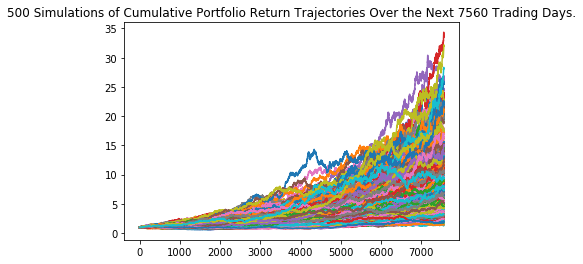

In [145]:
# Plot simulation outcomes
line_plot = MC_StockData.plot_simulation()

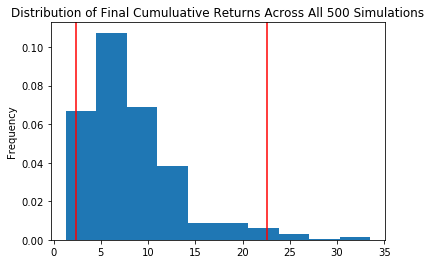

In [146]:
# Plot probability distribution and confidence intervals
dist_plot = MC_StockData.plot_distribution()

### Retirement Analysis

In [147]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_StockData.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              8.306105
std               4.945869
min               1.292901
25%               4.774419
50%               7.259161
75%              10.295968
max              33.511356
95% CI Lower      2.395371
95% CI Upper     22.589125
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [148]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47907.42 and $451782.5


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [149]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71861.14 and $677673.76


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [150]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

# Setting  number of simulations
num_sims = 500

MC_5y_StockData = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [151]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5y_StockData.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994892,1.005062,1.006183,1.015396,1.007579,0.997847,0.996824,1.007820,0.999202,1.018786,...,1.006430,0.996779,1.000381,0.994009,0.989641,1.000026,1.006125,0.990950,1.000105,1.008674
2,0.992429,1.006823,1.021723,1.014678,1.004387,0.997580,0.995906,1.002048,1.005136,1.022988,...,0.998347,0.990613,1.011109,1.003128,0.997712,1.014135,1.009152,0.991450,0.995157,1.012960
3,0.988205,1.013940,1.023093,1.001356,0.999267,1.012593,0.987476,1.005225,0.996875,1.026111,...,1.002442,0.994997,1.017781,1.003884,1.007801,1.020208,1.017146,0.986869,0.998914,1.007538
4,0.990145,1.021956,1.014322,1.008117,1.011434,1.005265,0.994053,1.004039,1.000755,1.025560,...,1.002637,0.986698,1.012360,1.014523,1.000548,1.025400,1.019693,0.982656,0.993844,1.011114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.433865,1.401222,1.015801,1.593714,1.157581,1.676384,1.987247,1.798755,1.298961,2.004467,...,1.459209,1.173786,1.563956,1.352343,2.018727,1.330079,1.670673,1.868160,1.323652,1.300233
1257,1.431993,1.409709,1.025169,1.589574,1.158755,1.677850,2.011561,1.805447,1.303068,2.001949,...,1.471744,1.184872,1.576488,1.365103,2.023200,1.324021,1.682764,1.865803,1.331433,1.309955
1258,1.413120,1.420216,1.031970,1.589709,1.163380,1.670511,2.010905,1.765884,1.293971,1.978207,...,1.468690,1.179644,1.586358,1.378845,2.031577,1.304131,1.688390,1.859695,1.333277,1.310704
1259,1.412674,1.411674,1.028184,1.613805,1.162665,1.672229,2.007256,1.749967,1.287198,1.968679,...,1.477492,1.181582,1.596316,1.386415,2.042944,1.296006,1.673775,1.877113,1.336369,1.304934


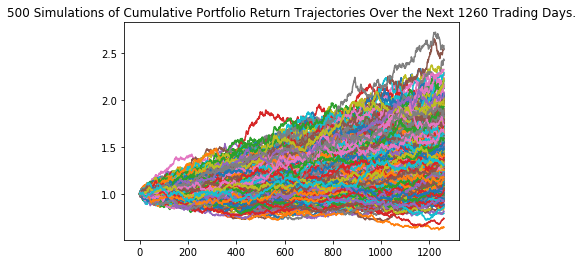

In [152]:
# Plot simulation outcomes
line_plot = MC_5y_StockData.plot_simulation()

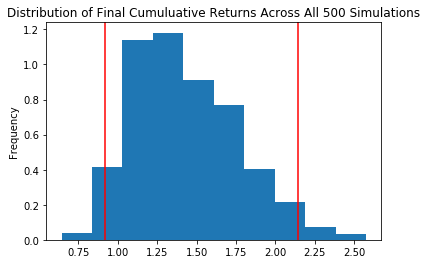

In [153]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_5y_StockData.plot_distribution()

In [154]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_5y_StockData.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean              1.432497
std               0.328938
min               0.643651
25%               1.181863
50%               1.392537
75%               1.645984
max               2.573933
95% CI Lower      0.918959
95% CI Upper      2.140711
Name: 1260, dtype: float64


In [155]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl[8]*60000,2)
ci_upper_five = round(even_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55137.56 and $128442.69


### Ten Years Retirement Option

In [156]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
# Setting  number of simulations
num_sims = 500

MC_10y_StockData = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [157]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10y_StockData.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006809,0.997910,1.001184,1.007330,1.002989,0.999903,1.002620,1.001948,1.002207,0.997465,...,1.001922,1.004570,0.999279,1.000812,0.999583,1.009270,0.998890,1.002113,1.005350,0.994684
2,0.991809,1.004950,1.015516,1.015203,0.996949,1.002239,1.002063,1.001901,1.009215,0.999038,...,1.003429,1.014973,0.985632,1.005418,1.005326,1.004541,0.997869,0.992373,1.002168,0.989574
3,1.001707,1.007115,1.012349,1.018745,1.003212,0.995646,1.007382,1.003549,1.002648,0.996326,...,1.010997,1.013417,0.981865,0.996017,0.994600,1.004406,1.003546,0.988395,1.002381,0.989556
4,1.012784,1.008681,1.014737,1.026499,1.005399,0.984040,1.007756,0.997246,1.006096,0.992439,...,1.005938,1.018988,0.979382,0.990526,1.003777,1.007922,0.997810,0.990376,0.993815,0.991286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.105481,1.652497,2.553737,2.151070,1.589982,1.780384,2.289502,1.227455,2.888819,1.631372,...,2.232979,2.639323,1.666667,3.526673,2.329013,1.999001,3.158194,1.847744,1.470207,1.779519
2517,1.098763,1.647447,2.569236,2.167395,1.582902,1.785328,2.294424,1.218880,2.882683,1.648540,...,2.236488,2.614811,1.660038,3.488490,2.329729,2.004372,3.164882,1.834486,1.470513,1.768756
2518,1.095904,1.664254,2.582908,2.162717,1.593616,1.777898,2.288390,1.232163,2.885580,1.652523,...,2.245084,2.620421,1.676352,3.498233,2.305594,1.988243,3.184826,1.860243,1.486415,1.778294
2519,1.092701,1.681544,2.576588,2.186687,1.614821,1.777087,2.309079,1.234100,2.882714,1.665747,...,2.255484,2.616880,1.674585,3.499091,2.294375,1.983867,3.206285,1.857735,1.481141,1.784457


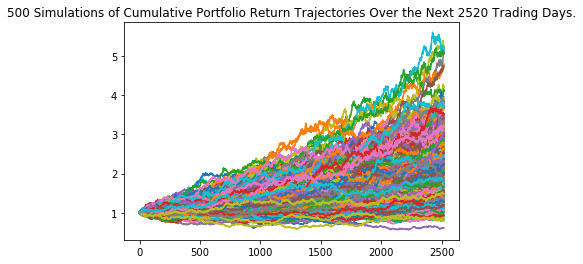

In [158]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_10y_StockData.plot_simulation()

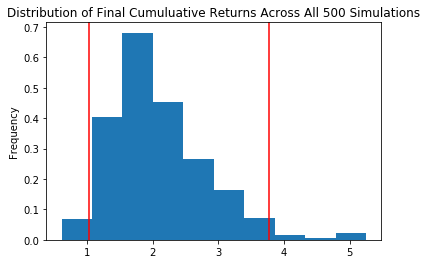

In [159]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_10y_StockData.plot_distribution()

In [160]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_10y_StockData.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean              2.079550
std               0.740194
min               0.607112
25%               1.583998
50%               1.924727
75%               2.465880
max               5.249700
95% CI Lower      1.021458
95% CI Upper      3.774461
Name: 2520, dtype: float64


In [162]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl[8]*60000,2)
ci_upper_ten = round(even_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61287.5 and $226467.66
